In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

In [68]:
df = pd.read_csv("xAPI-Edu-Data.csv")

In [69]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [70]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [71]:
df = df.dropna()

In [72]:
df.shape

(480, 17)

In [73]:
df.duplicated().sum()

2

In [74]:
df = df.drop_duplicates()

In [75]:
df.shape

(478, 17)

In [76]:
df_features = df.drop(columns=["Class"])

In [77]:
label_enc = LabelEncoder()
for col in df_features.select_dtypes(include=["object"]).columns:
    df_features[col] = label_enc.fit_transform(df_features[col])

In [78]:
scaler = StandardScaler()
X = scaler.fit_transform(df_features)
X.shape

(478, 16)

In [79]:
inertia = []
silhouette = []
K_range = range(2, 11)

In [80]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

C:\Users\amrit\Downloads\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\amrit\Downloads\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\amrit\Downloads\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\amrit\Downloads\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

Text(0, 0.5, 'Inertia')

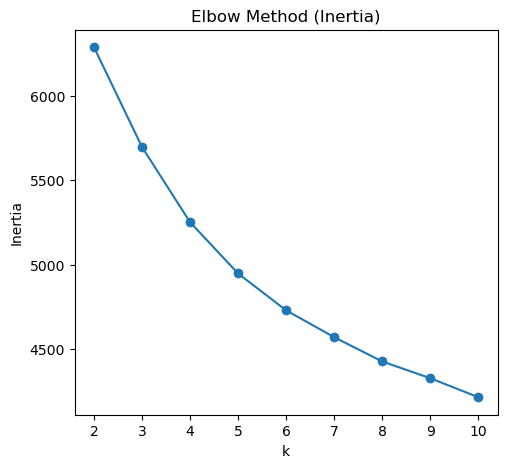

In [81]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method (Inertia)")
plt.xlabel("k"); plt.ylabel("Inertia")

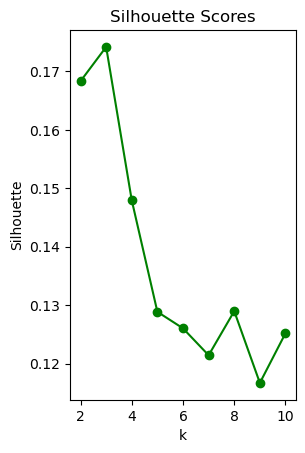

In [82]:
plt.subplot(1,2,2)
plt.plot(K_range, silhouette, marker="o", color="green")
plt.title("Silhouette Scores")
plt.xlabel("k"); plt.ylabel("Silhouette")
plt.show()

In [83]:
best_k = 3 
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

C:\Users\amrit\Downloads\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [84]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

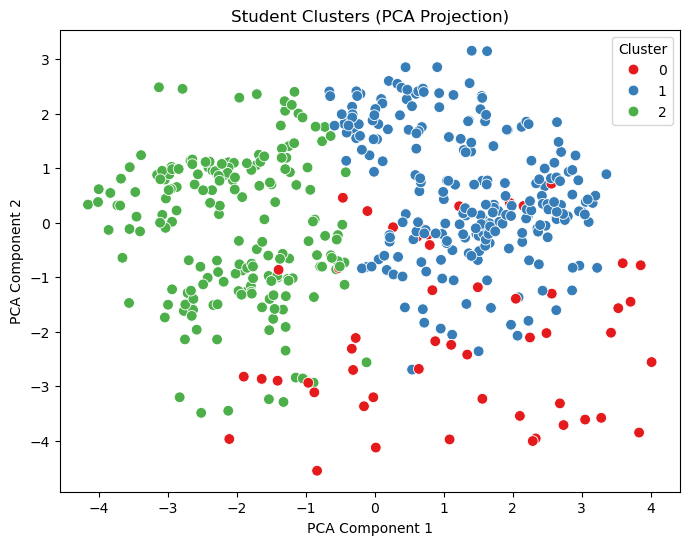

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set1", s=60)
plt.title("Student Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [55]:
silhouette_vals = silhouette_samples(X, df["Cluster"])
y_ax_lower, y_ax_upper = 0, 0
yticks = []

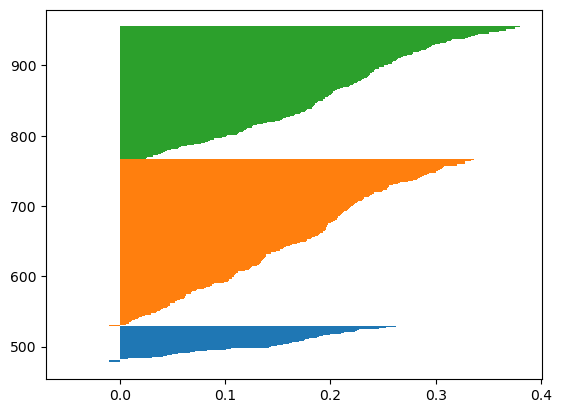

In [86]:
for i in range(best_k):
    c_silhouette_vals = silhouette_vals[df["Cluster"] == i]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (3).

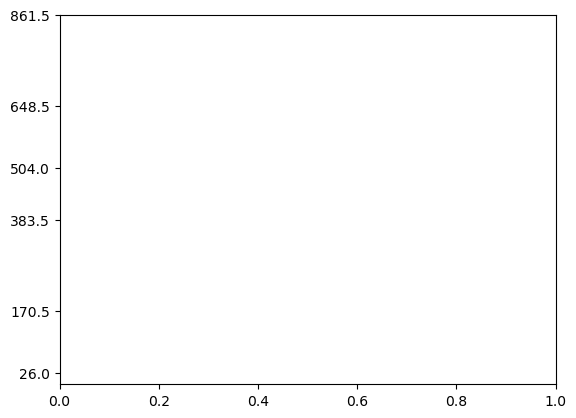

In [97]:
plt.yticks(yticks, [f"Cluster {i}" for i in range(best_k)])
plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

In [58]:
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
cluster_summary

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Cluster,,,,
0,55.519231,63.346154,45.307692,40.692308
1,66.426160,78.578059,52.928270,51.978903
2,20.010582,23.074074,17.306878,33.412698


In [59]:
cross_tab = pd.crosstab(df["Cluster"], df["Class"])
cross_tab

Class,H,L,M
Cluster,,,
0,25,8,19
1,111,3,123
2,6,114,69


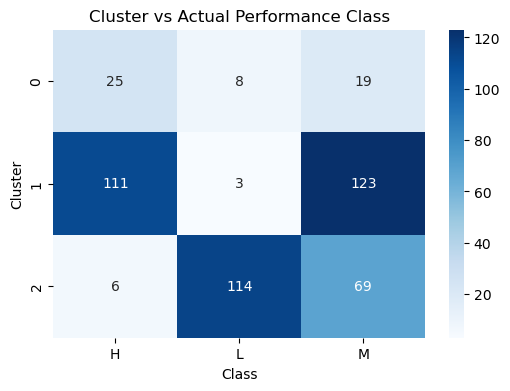

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
plt.title("Cluster vs Actual Performance Class")
plt.show()